<a href="https://colab.research.google.com/github/BrandonBosire/Moringa-School-Week-4-IP/blob/main/Moringa_Data_Science_Prep_W4_Independent_Project_2021_09_Brandon_Moreno_DataScience_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Assessment
Overview

In this week's independent project, you will be working as a data scientist working for an electric car-sharing service company. You have been tasked to process stations data to understand electric car usage over time by solving for the following research question;

Research Question

Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.


Do the results change if you consider Utilib and Utilib 1.4 instead of Blue cars?

We will also be required to write a data report .The Data Report will also need to have an objective account, with insights majorly coming from the dataset.

The dataset for analysis are :
You can get the data and the dataset description for this Independent project here [http://bit.ly/autolib_dataset] and here respectively https://drive.google.com/a/moringaschool.com/file/d/13DXF2CFWQLeYxxHFekng8HJnH_jtbfpN/view?usp=sharing .The dataset contains data collected for a period of 9 days.

Before we can begin to analysis this data we will be required to clean the raw data provided regarding the case in question.We will approach this by using the basic python data cleaning methodology:

1) Validity check. 

2) Accuracy check.

3) Completeness confirmation.

4) Consitency check.

5) Uniformityconfirmation.
 


In [43]:
#To begin working on our dataset we first have ton import it.
#To do this we will import the neccessary libraries for operation on datasets.
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
% matplotlib inline 
import seaborn as sns

In [2]:
#We will now import the database itself:
#Autolib_dataset giving it the name df
#We will also save a copy to assist in prevention of errors.
#
dfs = pd.read_csv('/content/Autolib_dataset (2).csv')
df = dfs

In [3]:
#We will now review the first ten rows of our data
#
df.head(10)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23
5,8 Boulevard Voltaire,0,0,0,0,0,nonexistent,Paris,NaN,paris-voltaire-8,STATION,"48.8657658, 2.3664376",75011,Paris/Voltaire/8,operational,NaN,4,station,ok,nonexistent,2018,4,6,7,2
6,37 rue Leblanc,0,0,0,0,0,nonexistent,Paris,"Station en parking (niv -1), accÃ¨s 37 rue Leb...",paris-citroencevennes-parking,PARKING,"48.83874, 2.27641",75015,Paris/CitroÃ«n CÃ©vennes/Parking,broken,NaN,0,station,closed,nonexistent,2018,4,8,18,20
7,17 Rue des Luaps ProlongÃ©e,3,3,1,0,0,nonexistent,Nanterre,NaN,nanterre-luaps-17,STATION,"48.88069, 2.21063",92000,Nanterre/Luaps/17,operational,NaN,0,station,ok,nonexistent,2018,4,4,22,13
8,34 avenue Jean Moulin,1,1,0,0,0,nonexistent,Paris,NaN,paris-jeanmoulin-34,STATION,"48.8266807, 2.3237355",75014,Paris/Jean Moulin/34,operational,NaN,4,station,ok,nonexistent,2018,4,2,22,58
9,41 boulevard de Rochechouart,6,6,0,0,0,nonexistent,Paris,NaN,paris-anvers-parking,PARKING,"48.88267, 2.34405",75009,Paris/Anvers/Parking,operational,NaN,0,station,ok,nonexistent,2018,4,4,15,2


In [81]:
#We will now begin the process of cleaning
#Firstly we will check to see the column names and the values they represent 
#Then we will see the valid and invalid columns
#Removing the ivalid, in this case the cars column.
#It is redundant with relation to Bluecars
df.columns
dfx=df.drop(['Cars'], axis = 1) 
dfx
  

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2AvenuedeSuffren,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145RueRaymondLosserand,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2AvenueJohnFitzgeraldKennedy,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51RueEugÃneOudinÃ,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6avenuedelaPortedeChamperret,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8avenueMÃnelotte,2,0,0,0,nonexistent,Colombes,NaN,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃ©nelotte/8,operational,NaN,3,station,ok,nonexistent,2018,4,6,11,26
4996,37ruedeDantzig,4,0,0,1,operational,Paris,NaN,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,NaN,2,station,ok,nonexistent,2018,4,4,16,56
4997,142rueduBac,1,0,0,1,operational,Paris,NaN,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,NaN,4,station,ok,nonexistent,2018,4,1,7,1
4998,2avenueduValdeFontenay,2,0,0,0,nonexistent,Fontenay-Sous-Bois,NaN,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,NaN,3,station,ok,nonexistent,2018,4,4,17,27


In [17]:
#Next we will clean any syntax errors in the dataset
#to do this we will run a sweep of all values,removing all special characters in the first column.
#
for column in df1.columns:
  if dfx[column].dtype != str:
    continue
  dfx[column] = df[column].str.replace(r'\W',"")

dfx['Public name']=df['Public name'].str.replace(r'\W',"")
dfx

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2AvenuedeSuffren,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,ParisSuffren2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145RueRaymondLosserand,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,ParisRaymondLosserand145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2AvenueJohnFitzgeraldKennedy,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,LeBourgetJohnFitzgeraldKennedy2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51RueEugÃneOudinÃ,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,ParisEugÃneOudinÃ51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6avenuedelaPortedeChamperret,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,ParisPortedeChamperret6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8avenueMÃnelotte,2,0,0,0,nonexistent,Colombes,NaN,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,ColombesMÃnelotte8,operational,NaN,3,station,ok,nonexistent,2018,4,6,11,26
4996,37ruedeDantzig,4,0,0,1,operational,Paris,NaN,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,ParisDantzig37,operational,NaN,2,station,ok,nonexistent,2018,4,4,16,56
4997,142rueduBac,1,0,0,1,operational,Paris,NaN,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,ParisBac142,operational,NaN,4,station,ok,nonexistent,2018,4,1,7,1
4998,2avenueduValdeFontenay,2,0,0,0,nonexistent,Fontenay-Sous-Bois,NaN,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,FontenaySousBoisValdeFontenay2,operational,NaN,3,station,ok,nonexistent,2018,4,4,17,27


In [18]:
#We will now check the accuracy of the data
#Ensuring that all cummulative sums add up correctly.
# There are no cummulations columns.

In [82]:
#We will now check for completeness of the data this is so that no missing values affect analysis.
#We will check for number of missing values per column.
#
print(dfx.isnull().sum())

Address                   0
Bluecar counter           0
Utilib counter            0
Utilib 1.4 counter        0
Charge Slots              0
Charging Status           0
City                      0
Displayed comment      4889
ID                        0
Kind                      0
Geo point                 0
Postal code               0
Public name               0
Rental status             0
Scheduled at           4953
Slots                     0
Station type              0
Status                    0
Subscription status       0
year                      0
month                     0
day                       0
hour                      0
minute                    0
dtype: int64


In [94]:
#We will now remove the diplayed comment column that have null values and do not add to the data
#
df2 =dfx.copy()
df2.drop(['Displayed comment'] , axis = 1, inplace=True)
df2

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2AvenuedeSuffren,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145RueRaymondLosserand,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2AvenueJohnFitzgeraldKennedy,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51RueEugÃneOudinÃ,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6avenuedelaPortedeChamperret,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8avenueMÃnelotte,2,0,0,0,nonexistent,Colombes,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃ©nelotte/8,operational,NaN,3,station,ok,nonexistent,2018,4,6,11,26
4996,37ruedeDantzig,4,0,0,1,operational,Paris,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,NaN,2,station,ok,nonexistent,2018,4,4,16,56
4997,142rueduBac,1,0,0,1,operational,Paris,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,NaN,4,station,ok,nonexistent,2018,4,1,7,1
4998,2avenueduValdeFontenay,2,0,0,0,nonexistent,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,NaN,3,station,ok,nonexistent,2018,4,4,17,27


In [95]:
#We will now drop duplicate values
#
df2

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2AvenuedeSuffren,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145RueRaymondLosserand,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2AvenueJohnFitzgeraldKennedy,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51RueEugÃneOudinÃ,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6avenuedelaPortedeChamperret,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8avenueMÃnelotte,2,0,0,0,nonexistent,Colombes,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃ©nelotte/8,operational,NaN,3,station,ok,nonexistent,2018,4,6,11,26
4996,37ruedeDantzig,4,0,0,1,operational,Paris,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,NaN,2,station,ok,nonexistent,2018,4,4,16,56
4997,142rueduBac,1,0,0,1,operational,Paris,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,NaN,4,station,ok,nonexistent,2018,4,1,7,1
4998,2avenueduValdeFontenay,2,0,0,0,nonexistent,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,NaN,3,station,ok,nonexistent,2018,4,4,17,27


In [96]:
#Finally we will rcheck for consistent Column values, this will be by removing irregular datatypes
#First confirm that these fit the field datatypes stated by their columns
#
df2.dtypes

Address                object
Bluecar counter         int64
Utilib counter          int64
Utilib 1.4 counter      int64
Charge Slots            int64
Charging Status        object
City                   object
ID                     object
Kind                   object
Geo point              object
Postal code             int64
Public name            object
Rental status          object
Scheduled at           object
Slots                   int64
Station type           object
Status                 object
Subscription status    object
year                    int64
month                   int64
day                     int64
hour                    int64
minute                  int64
dtype: object

In [97]:
#We will now change to string the Charging Status ,City,ID,Kind,Geo point columns
#
convert = {'Charging Status': str,'City': str,'Kind': str,'ID': str,'Geo point': str}
df2 =df2.astype(convert)
df2.dtypes


Address                object
Bluecar counter         int64
Utilib counter          int64
Utilib 1.4 counter      int64
Charge Slots            int64
Charging Status        object
City                   object
ID                     object
Kind                   object
Geo point              object
Postal code             int64
Public name            object
Rental status          object
Scheduled at           object
Slots                   int64
Station type           object
Status                 object
Subscription status    object
year                    int64
month                   int64
day                     int64
hour                    int64
minute                  int64
dtype: object

In [98]:
#We will now convert the columns into uppercase format.
#
df2.columns.str.upper()

Index(['ADDRESS', 'BLUECAR COUNTER', 'UTILIB COUNTER', 'UTILIB 1.4 COUNTER',
       'CHARGE SLOTS', 'CHARGING STATUS', 'CITY', 'ID', 'KIND', 'GEO POINT',
       'POSTAL CODE', 'PUBLIC NAME', 'RENTAL STATUS', 'SCHEDULED AT', 'SLOTS',
       'STATION TYPE', 'STATUS', 'SUBSCRIPTION STATUS', 'YEAR', 'MONTH', 'DAY',
       'HOUR', 'MINUTE'],
      dtype='object')

In [113]:
df2.columns= df2.columns.str.upper()
df2
dfs=df2.copy()
dfs

,ADDRESS,BLUECAR COUNTER,UTILIB COUNTER,UTILIB 1.4 COUNTER,CHARGE SLOTS,CHARGING STATUS,CITY,ID,KIND,GEO POINT,POSTAL CODE,PUBLIC NAME,RENTAL STATUS,SCHEDULED AT,SLOTS,STATION TYPE,STATUS,SUBSCRIPTION STATUS,YEAR,MONTH,DAY,HOUR,MINUTE
0,2AvenuedeSuffren,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145RueRaymondLosserand,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
3,51RueEugÃneOudinÃ,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6avenuedelaPortedeChamperret,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23
5,8BoulevardVoltaire,0,0,0,0,nonexistent,Paris,paris-voltaire-8,STATION,"48.8657658, 2.3664376",75011,Paris/Voltaire/8,operational,NaN,4,station,ok,nonexistent,2018,4,6,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,3avenuedIvry,0,0,0,2,operational,Paris,paris-ivry-3,STATION,"48.82175, 2.36868",75013,Paris/Ivry/3,operational,NaN,6,station,ok,nonexistent,2018,4,9,23,1
4994,15ruedeRocroy,0,0,0,0,operational,Paris,paris-rocroy-15,STATION,"48.8801236, 2.3509617",75010,Paris/Rocroy/15,operational,NaN,1,station,ok,nonexistent,2018,4,1,20,49
4996,37ruedeDantzig,4,0,0,1,operational,Paris,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,NaN,2,station,ok,nonexistent,2018,4,4,16,56
4997,142rueduBac,1,0,0,1,operational,Paris,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,NaN,4,station,ok,nonexistent,2018,4,1,7,1


In [101]:
#We will now drop all rows where city is not Paris
#
df2=df2.drop(index=df2[df2['CITY']!='Paris'].index)
df2
df3=df2.copy()

In [116]:
#Finally, we will sort the table in descending order.
#
dffinal=dffinal.sort_values(by=['BLUECAR COUNTER'],ascending=False)
dffinal

,ADDRESS,BLUECAR COUNTER,UTILIB COUNTER,UTILIB 1.4 COUNTER,CHARGE SLOTS,CHARGING STATUS,CITY,ID,KIND,GEO POINT,POSTAL CODE,PUBLIC NAME,RENTAL STATUS,SCHEDULED AT,SLOTS,STATION TYPE,STATUS,SUBSCRIPTION STATUS,YEAR,MONTH,DAY,HOUR,MINUTE
3115,2rueduGÃnÃralRenault,7,0,0,0,nonexistent,Paris,paris-renault-2,STATION,"48.8611413, 2.3781941",75011,Paris/Renault/2,operational,NaN,0,station,ok,nonexistent,2018,4,9,17,24
2470,2rueduGÃnÃralRenault,7,0,0,0,nonexistent,Paris,paris-renault-2,STATION,"48.8611413, 2.3781941",75011,Paris/Renault/2,operational,NaN,0,station,ok,nonexistent,2018,4,9,3,12
2879,1rueBoulard,6,0,0,0,operational,Paris,paris-boulard-1,STATION,"48.8348549, 2.3297831",75014,Paris/Boulard/1,operational,NaN,0,station,ok,nonexistent,2018,4,4,21,36
3427,142RuedeBagnolet,6,0,0,0,operational,Paris,paris-bagnolet-142,STATION,"48.8614319, 2.4056437",75020,Paris/Bagnolet/142,operational,NaN,0,station,ok,nonexistent,2018,4,5,0,16
1847,63rueLecourbe,6,0,0,0,operational,Paris,paris-lecourbe-63,STATION,"48.8435537, 2.3061617",75015,Paris/Lecourbe/63,operational,NaN,0,station,ok,nonexistent,2018,4,5,7,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,75ruedelaChapelle,0,0,0,0,nonexistent,Paris,paris-chapelle-75,STATION,"48.8967147, 2.3591686",75018,Paris/Chapelle/75,broken,NaN,0,station,closed,nonexistent,2018,4,6,0,55
1268,7ruedePommard,0,0,0,0,nonexistent,Paris,paris-pommard-7,STATION,"48.8355193, 2.3850356",75012,Paris/Pommard/7,operational,NaN,4,station,ok,nonexistent,2018,4,3,3,44
3287,80ruedeReuilly,0,0,1,0,nonexistent,Paris,paris-reuilly-80,STATION,"48.8431101, 2.3912439",75012,Paris/Reuilly/80,operational,NaN,5,station,ok,nonexistent,2018,4,9,16,28
3286,52boulevarddeCharonne,0,0,0,2,operational,Paris,paris-charonne-52,STATION,"48.8518536, 2.3982137",75020,Paris/Charonne/52,operational,NaN,4,station,ok,nonexistent,2018,4,2,20,3


In [124]:
#We will now look into the statistical values of the columns
#
df3

,ADDRESS,BLUECAR COUNTER,UTILIB COUNTER,UTILIB 1.4 COUNTER,CHARGE SLOTS,CHARGING STATUS,CITY,ID,KIND,GEO POINT,POSTAL CODE,PUBLIC NAME,RENTAL STATUS,SCHEDULED AT,SLOTS,STATION TYPE,STATUS,SUBSCRIPTION STATUS,YEAR,MONTH,DAY,HOUR,MINUTE
0,2AvenuedeSuffren,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145RueRaymondLosserand,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
3,51RueEugÃneOudinÃ,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6avenuedelaPortedeChamperret,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23
5,8BoulevardVoltaire,0,0,0,0,nonexistent,Paris,paris-voltaire-8,STATION,"48.8657658, 2.3664376",75011,Paris/Voltaire/8,operational,NaN,4,station,ok,nonexistent,2018,4,6,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,3avenuedIvry,0,0,0,2,operational,Paris,paris-ivry-3,STATION,"48.82175, 2.36868",75013,Paris/Ivry/3,operational,NaN,6,station,ok,nonexistent,2018,4,9,23,1
4994,15ruedeRocroy,0,0,0,0,operational,Paris,paris-rocroy-15,STATION,"48.8801236, 2.3509617",75010,Paris/Rocroy/15,operational,NaN,1,station,ok,nonexistent,2018,4,1,20,49
4996,37ruedeDantzig,4,0,0,1,operational,Paris,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,NaN,2,station,ok,nonexistent,2018,4,4,16,56
4997,142rueduBac,1,0,0,1,operational,Paris,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,NaN,4,station,ok,nonexistent,2018,4,1,7,1


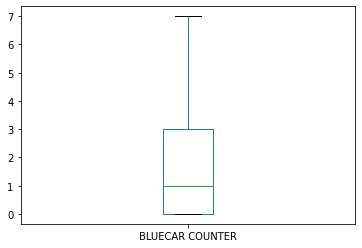

In [103]:
#From here we will look into the trend identification for the the given dataset to identify:
#1.Outliers
#2.Trends.
#
#1.
#We will look into the specific plot for the BLUECAR COUNTER column,then the rest of the columns
#To try identify any outliers
df3.boxplot(column =['BLUECAR COUNTER'], grid = False) 


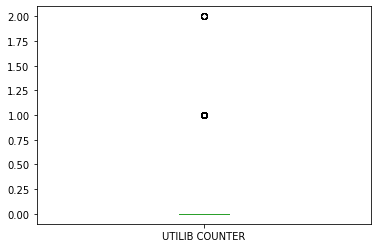

In [104]:
df3.boxplot(column =['UTILIB COUNTER'], grid = False) 

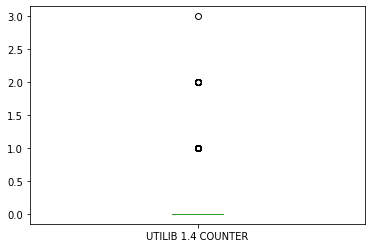

In [105]:
df3.boxplot(column =['UTILIB 1.4 COUNTER'], grid = False) 

In [70]:
#From the above we can note that there are no outliers for the Utilib and BLUECAR fields
#There is however an outlier in the UTILIB 1.4

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


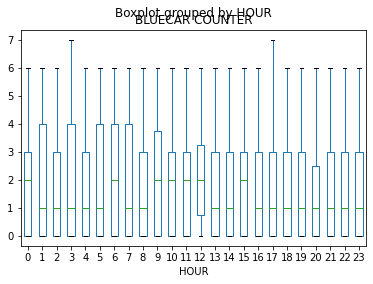

In [106]:
#2.
#
#We will now look into the multiple variables in the fields and note any trends for evaluation. 
#The first variables will be for the BLUECAR column
#The day with the most cars is the 3rd day ofthe month.
#The hour with the most cars is the 3 rd hour
#The minute with the most cars is 25 th minute.
#
df3.boxplot(column =['BLUECAR COUNTER'], by ='HOUR', grid = False) 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


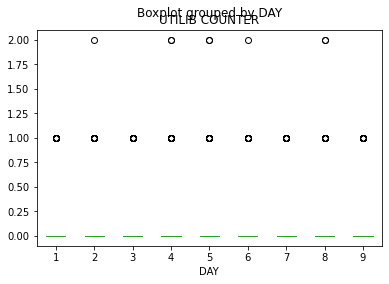

In [107]:
#The second variables will be for the UTILIB column
#This utilib data has two outliers for day.
#This utilib data has nine outliers for hour.
#This utilib data has twelve outliers for minute. 
df3.boxplot(column =['UTILIB COUNTER'], by ='DAY', grid = False) 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


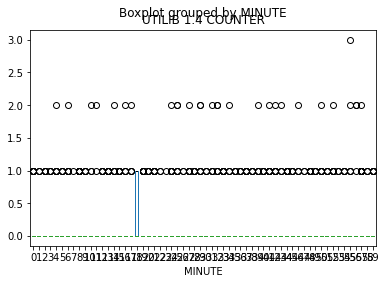

In [108]:
#This utilib 1.4 data has three outliers for day.
#This utilib 1.4 data has six outliers for hour.
#This utilib 1.4 data has twenty two outliers for minute. 
df3.boxplot(column =['UTILIB 1.4 COUNTER'], by ='MINUTE', grid = False) 

In [109]:
dffinal = df3.copy()